<a href="https://colab.research.google.com/github/jaybeberry9591/graph_theory_assignments/blob/main/agglomerative_clustering_boston_crime_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [4]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [5]:
#csv file import and modifying the columns name
df = pd.read_csv("/content/drive/MyDrive/crime_boston.csv",encoding = 'windows-1252')
df.columns = df.columns.str.lower() # changing the columns name to work more easily

In [6]:
#information regarding the csv file
df.shape

(319073, 17)

In [7]:
df.columns

Index(['incident_number', 'offense_code', 'offense_code_group',
       'offense_description', 'district', 'reporting_area', 'shooting',
       'occurred_on_date', 'year', 'month', 'day_of_week', 'hour', 'ucr_part',
       'street', 'lat', 'long', 'location'],
      dtype='object')

In [8]:
df.head(20)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,9/2/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,8/21/2018 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,9/3/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,9/3/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,9/3/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,9/3/2018 21:09,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,9/3/2018 21:25,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,9/3/2018 20:39,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,9/3/2018 20:48,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,9/3/2018 20:38,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [9]:
df.isnull().sum()

incident_number             0
offense_code                0
offense_code_group          0
offense_description         0
district                 1765
reporting_area              0
shooting               318054
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part                   90
street                  10871
lat                     19999
long                    19999
location                    0
dtype: int64

In [10]:
df['occurred_on_date'] = pd.to_datetime(df['occurred_on_date'])

In [11]:
df.duplicated().sum()

23

In [12]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace = True)

In [13]:
df.shape

(319050, 17)

In [14]:
df.drop_duplicates(subset= ['incident_number','offense_code'], inplace=True)
df.reset_index(drop=True, inplace = True)

In [15]:
df.duplicated(['incident_number','offense_code'], keep = False).any()

False

In [16]:
# summary of numerical ones
df.describe(include='number')

,offense_code,year,month,hour,lat,long
count,319037.000000,319037.000000,319037.000000,319037.000000,299039.000000,299039.000000
mean,2317.536248,2016.560719,6.609603,13.118121,42.214368,-70.908252
std,1185.310509,0.996299,3.273643,6.294283,2.159892,3.493822
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297424,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [17]:
# summary of categorical ones
df.describe(include=['object']).T

,count,unique,top,freq
incident_number,319037,282517,I162030584,13
offense_code_group,319037,67,Motor Vehicle Accident Response,37132
offense_description,319037,241,SICK/INJURED/MEDICAL - PERSON,18783
district,317272,12,B2,49939
reporting_area,319037,879,,20250
shooting,1019,1,Y,1019
day_of_week,319037,7,Friday,48488
ucr_part,318948,4,Part Three,158534
street,308166,4657,WASHINGTON ST,14191
location,319037,18194,"(0.00000000, 0.00000000)",19998


In [18]:
df.dropna(subset= ["lat"], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [19]:
df = df.drop(df[df.lat < 30].index)
df.reset_index(drop=True, inplace = True)

In [20]:
df[df['district'].isna()].head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
15,I182070920,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 19:43:00,2018,9,Monday,19,Part Three,NaN,42.352875,-71.073830,"(42.35287456, -71.07382970)"
24,I182070906,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
38,I182070889,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
39,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
40,I182070889,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"


In [21]:
df.dropna(subset= ['district'], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [22]:
df.dropna(subset= ['street'], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [23]:
df.shape

(296476, 17)

In [24]:
df.dropna(subset= ['shooting'], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [25]:
df[df['district'].isna()].head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location


In [26]:
df.shape

(976, 17)

In [27]:
df.reset_index(drop=True, inplace = True) # Reset index, in case I forgot to do it before when deleting rows
df_before_del_col = df.copy() # create a copy of the DF before dropping columns

In [28]:
df.drop('incident_number', axis = 1, inplace = True)
df.drop('offense_code', axis = 1, inplace = True)
df.drop('offense_description', axis = 1, inplace = True)
df.drop('reporting_area', axis = 1, inplace = True)
df.drop('occurred_on_date', axis = 1, inplace = True)
df.drop('year', axis = 1, inplace = True)
df.drop('street', axis = 1, inplace = True)
df.drop('location', axis = 1, inplace = True)

In [29]:
import os
lookup = {
    1: 'Night',
    2: 'Night',
    3: 'Night',
    4: 'Night',
    5: 'Night',
    6: 'Night',
    7: 'Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'Morning',
    13:'Afternoon',
    14:'Afternoon',
    15:'Afternoon',
    16:'Afternoon',
    17:'Afternoon',
    18:'Afternoon',
    19:'Evening',
    20:'Evening',
    21:'Evening',
    22:'Evening',
    23:'Evening',
    0:'Evening'
}
for fname in os.listdir('.'):
    df['day_period'] = df['hour'].apply(lambda x: lookup[x])

In [30]:
lookup = {
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn'
}
for fname in os.listdir('.'):
    df['season'] = df['month'].apply(lambda x: lookup[x])

In [31]:
lookup = {
    'Monday': 1,
    'Tuesday': 1,
    'Wednesday': 1,
    'Thursday': 1,
    'Friday': 1,
    'Saturday': 0,
    'Sunday': 0,
}
for fname in os.listdir('.'):
    df['weekday'] = df['day_of_week'].apply(lambda x: lookup[x])

In [32]:
df.sample(10)

,offense_code_group,district,shooting,month,day_of_week,hour,ucr_part,lat,long,day_period,season,weekday
371,Aggravated Assault,C11,Y,6,Thursday,20,Part One,42.299181,-71.064291,Evening,Summer,1
959,Aggravated Assault,B3,Y,7,Thursday,18,Part One,42.286215,-71.079677,Afternoon,Summer,1
407,Drug Violation,B3,Y,6,Saturday,14,Part Two,42.299263,-71.076265,Afternoon,Summer,0
331,Warrant Arrests,E18,Y,7,Sunday,19,Part Three,42.250504,-71.130904,Evening,Summer,0
133,Ballistics,B2,Y,3,Wednesday,16,Part Two,42.322216,-71.082067,Afternoon,Spring,1
965,Aggravated Assault,B3,Y,6,Saturday,19,Part One,42.293843,-71.076094,Evening,Summer,0
301,Aggravated Assault,B2,Y,9,Sunday,19,Part One,42.320838,-71.090186,Evening,Autumn,0
963,Search Warrants,C11,Y,7,Thursday,11,Part Three,42.290265,-71.065990,Morning,Summer,1
893,Homicide,B2,Y,8,Saturday,2,Part One,42.311955,-71.078719,Night,Summer,0
170,Aggravated Assault,B2,Y,12,Saturday,19,Part One,42.320597,-71.064901,Evening,Winter,0


In [33]:
df.drop('month', axis = 1, inplace = True)
df.drop('hour', axis = 1, inplace = True)
df.drop('day_of_week', axis = 1, inplace = True)

In [34]:
df.to_csv('df_crimes_cleaned.csv')

In [35]:
df = pd.read_csv('df_crimes_cleaned.csv', sep=",", index_col=0)
df.head()

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,Aggravated Assault,E18,Y,Part One,42.250405,-71.131737,Evening,Summer,1
1,Aggravated Assault,B2,Y,Part One,42.321042,-71.072153,Evening,Summer,1
2,Homicide,B2,Y,Part One,42.315689,-71.089514,Afternoon,Summer,1
3,Ballistics,B2,Y,Part Two,42.315689,-71.089514,Afternoon,Summer,1
4,Aggravated Assault,A15,Y,Part One,42.378085,-71.057841,Evening,Summer,0


In [36]:
df.isnull().sum()

offense_code_group    0
district              0
shooting              0
ucr_part              5
lat                   0
long                  0
day_period            0
season                0
weekday               0
dtype: int64

In [37]:
df.dropna(subset= ['ucr_part'], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [38]:
df.describe(include='number')

,lat,long,weekday
count,971.000000,971.000000,971.000000
mean,42.310604,-71.082780,0.624099
std,0.023461,0.019733,0.484604
min,42.236311,-71.167152,0.000000
25%,42.293905,-71.091878,0.000000
50%,42.312508,-71.081310,1.000000
75%,42.325840,-71.070898,1.000000
max,42.389572,-71.006921,1.000000


In [39]:
# summary of categorical ones
df.describe(include=['object']).T

,count,unique,top,freq
offense_code_group,971,26,Aggravated Assault,502
district,971,12,B2,333
shooting,971,1,Y,971
ucr_part,971,4,Part One,633
day_period,971,4,Evening,454
season,971,4,Summer,352


In [40]:
df.head(5)

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,Aggravated Assault,E18,Y,Part One,42.250405,-71.131737,Evening,Summer,1
1,Aggravated Assault,B2,Y,Part One,42.321042,-71.072153,Evening,Summer,1
2,Homicide,B2,Y,Part One,42.315689,-71.089514,Afternoon,Summer,1
3,Ballistics,B2,Y,Part Two,42.315689,-71.089514,Afternoon,Summer,1
4,Aggravated Assault,A15,Y,Part One,42.378085,-71.057841,Evening,Summer,0


In [41]:
df.columns

Index(['offense_code_group', 'district', 'shooting', 'ucr_part', 'lat', 'long',
       'day_period', 'season', 'weekday'],
      dtype='object')

In [42]:
df['offense_code_group'].value_counts()

Aggravated Assault                 502
Homicide                           113
Firearm Violations                  69
Warrant Arrests                     69
Ballistics                          40
Search Warrants                     29
Drug Violation                      28
Medical Assistance                  20
Robbery                             18
Vandalism                           17
Other                               14
Investigate Property                13
Motor Vehicle Accident Response      6
Investigate Person                   6
Simple Assault                       5
Disorderly Conduct                   3
Towed                                3
Firearm Discovery                    3
Property Found                       3
Property Lost                        2
Violations                           2
Recovered Stolen Property            2
Manslaughter                         1
Property Related Damage              1
Police Service Incidents             1
Missing Person Located   

In [43]:
df_model = pd.DataFrame()

In [44]:
data = df.iloc[:, 4:6].values

In [45]:
data

array([[ 42.2504055 , -71.1317374 ],
       [ 42.32104169, -71.07215291],
       [ 42.3156892 , -71.08951391],
       ...,
       [ 42.31780762, -71.0668499 ],
       [ 42.33358389, -71.08554259],
       [ 42.31161123, -71.076256  ]])

Text(0, 0.5, 'Euclidean Distances')

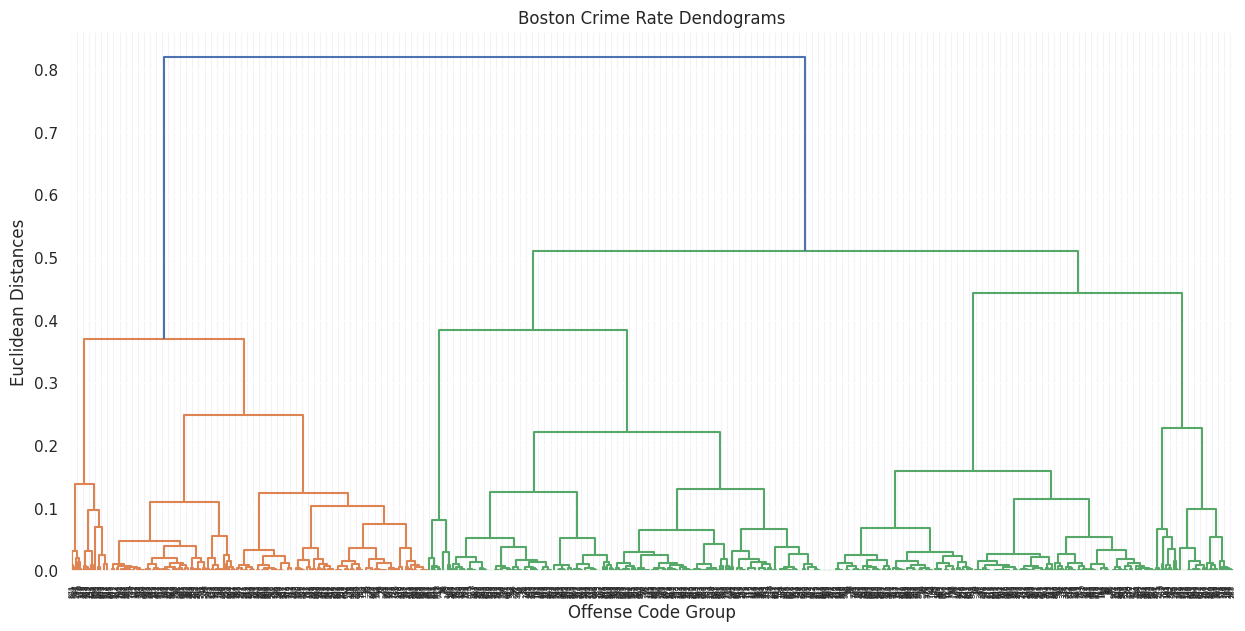

In [51]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 7))
plt.title("Boston Crime Rate Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.xlabel('Offense Code Group')
plt.ylabel('Euclidean Distances')

In [47]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(data)

In [48]:
labels_

array([0, 1, 1, 1, 2, 2, 1, 0, 4, 3, 3, 0, 1, 1, 0, 0, 2, 4, 1, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 0, 4, 4, 4, 4, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 2, 0, 3, 3, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 0, 1, 1, 0, 3, 3, 1, 0, 0, 0, 1, 3,
       0, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 2, 2, 2, 2, 3, 0, 3, 0, 0, 1, 2,
       0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 1, 4, 4, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 1, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 0, 0, 0, 3, 0, 3, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1,
       1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 1, 3, 3, 0, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1,

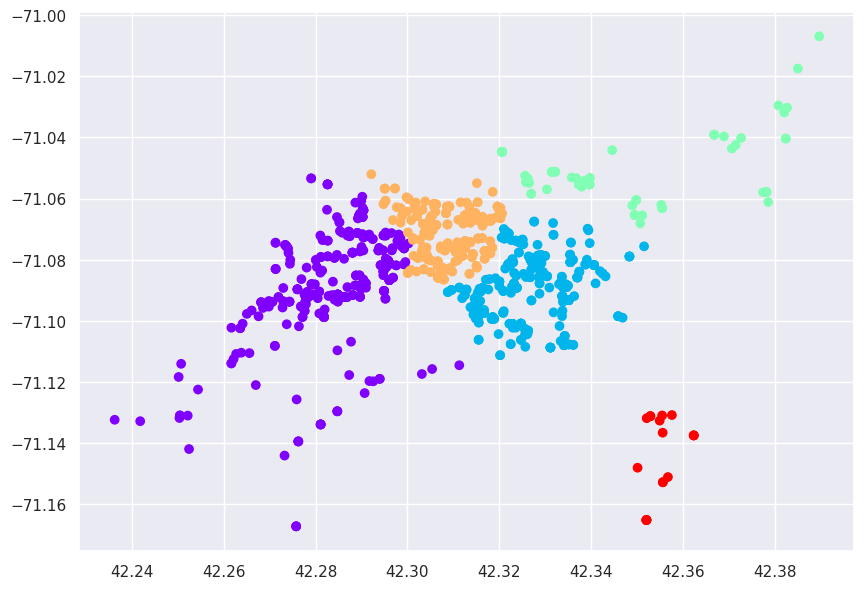

In [49]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')